In [1]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


In [2]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model
import time

Using TensorFlow backend.


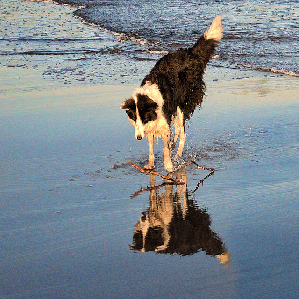

In [3]:
image = load_img('example.jpg', target_size=(299, 299))
image

In [4]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('ImgCap_V2_ResNet_vec/tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

InceptionResnetV2FT = load_model('ImgCap_V2_ResNet_vec/model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='example.jpg'

photo = extract_features(fname)
# generate description
description = generate_desc(InceptionResnetV2FT, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)


startseq dog is running through the grass endseq
48.892359495162964


In [9]:
output_str=' '.join(description.split()[1:-1])
output_str

'dog is running through the grass'

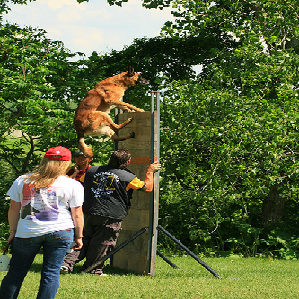

In [3]:
image = load_img('2838125339_3dd314e315.jpg', target_size=(299, 299))
image

In [4]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='2838125339_3dd314e315.jpg'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)


startseq two people are playing with their hands on the street endseq
55.93024802207947


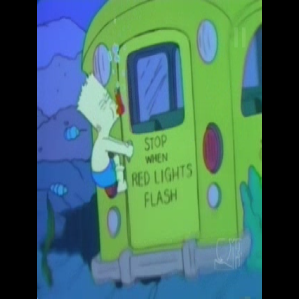

In [3]:
image = load_img('1.png', target_size=(299, 299))
image

In [4]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='1.png'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)


startseq man in red shirt is sitting on the street endseq
53.51473951339722


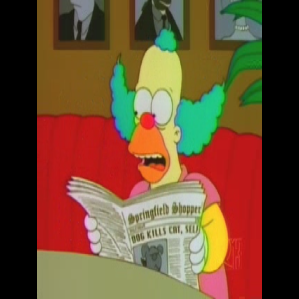

In [5]:
image = load_img('2.png', target_size=(299, 299))
image

In [3]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='2.png'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)


startseq man in red shirt is sitting on bench with his arms in the air endseq
47.13782501220703


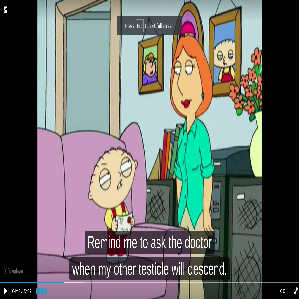

In [6]:
image = load_img('3.png', target_size=(299, 299))
image

In [3]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='3.png'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)


startseq man in red shirt is sitting on bench with her arms in the air endseq
43.13498115539551


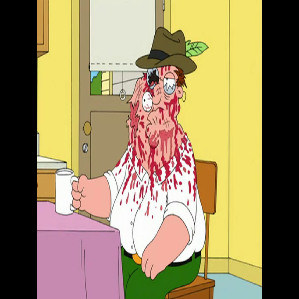

In [7]:
image = load_img('4.png', target_size=(299, 299))
image

In [6]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='4.png'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)


startseq man in red shirt is sitting on the sidewalk endseq
46.195029973983765


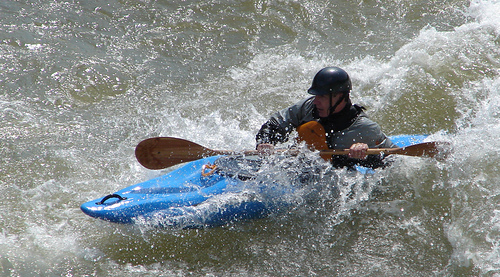

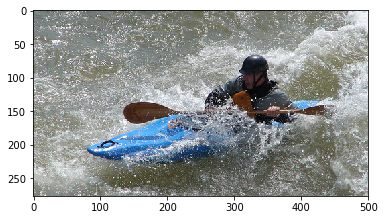

In [15]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(fname)

# You may need to convert the color.
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
im_pil = Image.fromarray(img)

# For reversing the operation:
im_np = np.asarray(im_pil)
plt.imshow(im_np)
im_pil

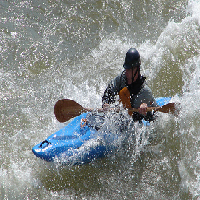

In [16]:
im_pil.resize((200,200))

In [17]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    im_pil = Image.fromarray(img)
    image=im_pil.resize((299,299))

    #image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='145721498_a27d2db576.jpg'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)

startseq man in yellow kayak is paddling through the water endseq
250.85090684890747


In [3]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='145721498_a27d2db576.jpg'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)

startseq man in yellow kayak is paddling through the water endseq
52.06115961074829


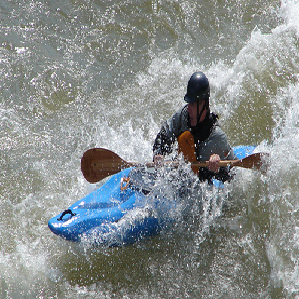

In [8]:
image = load_img(fname, target_size=(299, 299))
image

In [ ]:

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = InceptionResNetV2()
    # re-structure the model
    
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    #model = load_model('inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
    
    # load the photo
    image = load_img(filename, target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.360-val_loss3.631.h5')
# load and prepare the photograph
#fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

fname='145721498_a27d2db576.jpg'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of e693bd0210a403b3192acc6073ad2e96 so we will re-download the data.
225214464/225209952 [==============================] - 889s 4us/step


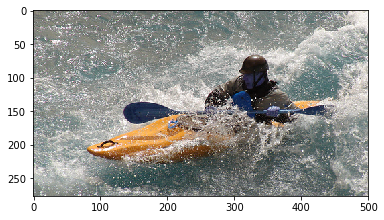

In [8]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('145721498_a27d2db576.jpg')
#img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

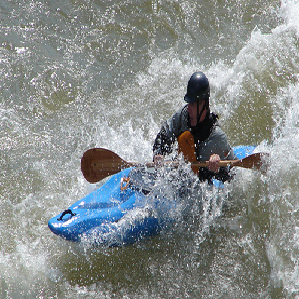

In [13]:
image = load_img('145721498_a27d2db576.jpg', target_size=(299, 299))
image

In [15]:
type(image),type(img)

(PIL.Image.Image, numpy.ndarray)

In [20]:
image=image.convert('BGRA')
image

ValueError: conversion from RGB to BGRA not supported

In [29]:
from PIL import Image
import numpy as np

img = cv2.imread('145721498_a27d2db576.jpg')

# You may need to convert the color.
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
im_pil = Image.fromarray(img)

# For reversing the operation:
im_np = np.asarray(im_pil)
plt.imshow(im_np)
im_pil

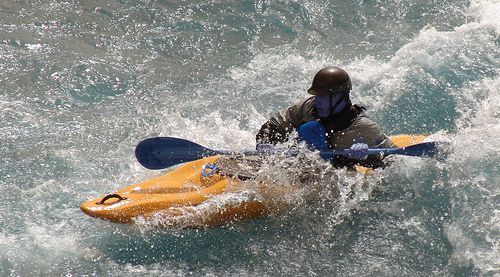

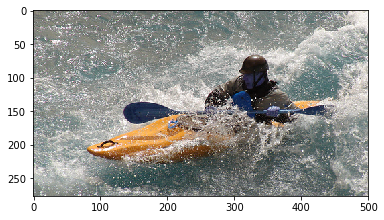

In [30]:
plt.imshow(im_np)
im_pil